In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import mlflow
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Exploration

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Type of data

In [6]:
data['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [7]:
# data.drop('customerID', axis=1, inplace=True)

In [8]:
gender_data=data['gender'].value_counts()

In [9]:
gender_data.Male

3555

# Bar Plot

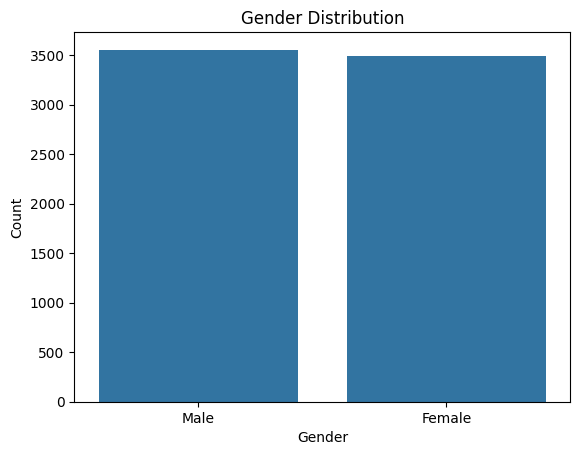

In [10]:
sns.barplot(x=gender_data.index, y=gender_data.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

* From the above plot we can infer that it data have both male and female in almost equal distribution

In [11]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen'>

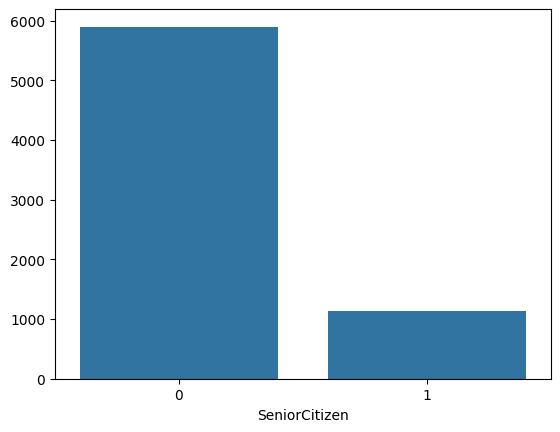

In [12]:
sns.barplot(x=data['SeniorCitizen'].value_counts().index, y=data['SeniorCitizen'].value_counts().values)

In [13]:
senior_gender_data = data.groupby(['SeniorCitizen','gender']).count()

In [14]:
senior_gender_data.unstack(level=1)

customerID       Partner       Dependents       tenure        \
gender            Female  Male  Female  Male     Female  Male Female  Male   
SeniorCitizen                                                                
0                   2920  2981    2920  2981       2920  2981   2920  2981   
1                    568   574     568   574        568   574    568   574   

              PhoneService        ... PaperlessBilling       PaymentMethod  \
gender              Female  Male  ...           Female  Male        Female   
SeniorCitizen                     ...                                        
0                     2920  2981  ...             2920  2981          2920   
1                      568   574  ...              568   574           568   

                    MonthlyCharges       TotalCharges        Churn        
gender         Male         Female  Male       Female  Male Female  Male  
SeniorCitizen                                                             
0              2981           2920  2981         2920  2981   2920  2981  
1               574            568   574          568   574    568   574  

[2 rows x 38 columns]

<Axes: xlabel='SeniorCitizen'>

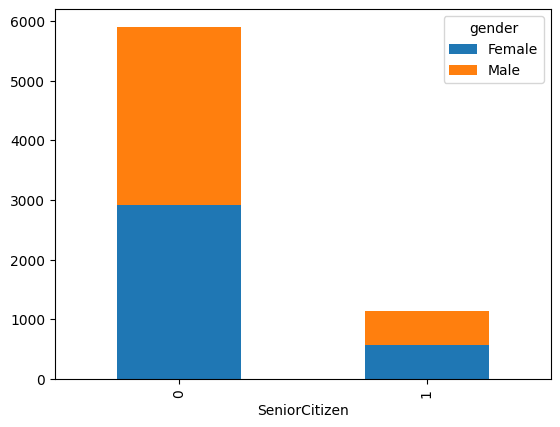

In [15]:
senior_gender_data.unstack(level=1)['customerID'].plot(kind='bar', stacked=True)

* From the above plot we can say that the in senior citizen we have both male and female in almost equal proportion. We have more non senior citizen which means most people who are taking in the data set are young/adult people

In [16]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Demography information analysis of customer

In [17]:
data.groupby(['SeniorCitizen','Partner']).count().unstack(level=1)

customerID       gender       Dependents       tenure        \
Partner               No   Yes     No   Yes         No   Yes     No   Yes   
SeniorCitizen                                                               
0                   3072  2829   3072  2829       3072  2829   3072  2829   
1                    569   573    569   573        569   573    569   573   

              PhoneService        ... PaperlessBilling       PaymentMethod  \
Partner                 No   Yes  ...               No   Yes            No   
SeniorCitizen                     ...                                        
0                     3072  2829  ...             3072  2829          3072   
1                      569   573  ...              569   573           569   

                    MonthlyCharges       TotalCharges       Churn        
Partner         Yes             No   Yes           No   Yes    No   Yes  
SeniorCitizen                                                            
0              2829           3072  2829         3072  2829  3072  2829  
1               573            569   573          569   573   569   573  

[2 rows x 38 columns]

<Axes: xlabel='SeniorCitizen'>

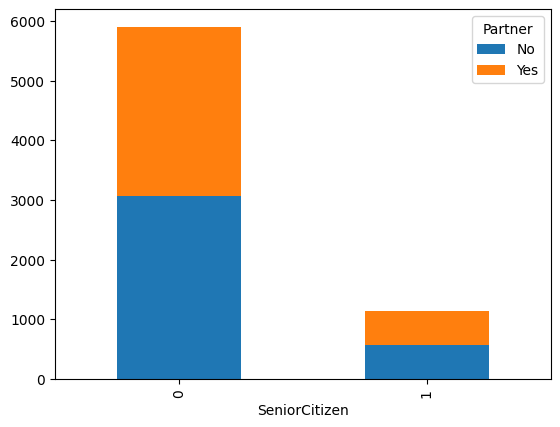

In [18]:
data.groupby(['SeniorCitizen','Partner']).count().unstack(level=1)['customerID'].plot(kind='bar', stacked=True)

In [19]:
data.groupby(['SeniorCitizen','Partner']).count().unstack(level=1)['gender']

Partner,No,Yes
SeniorCitizen,,
0,3072,2829
1,569,573


* How many people who have partners are churning . whats ther impact on the churn rate

<Axes: ylabel='Frequency'>

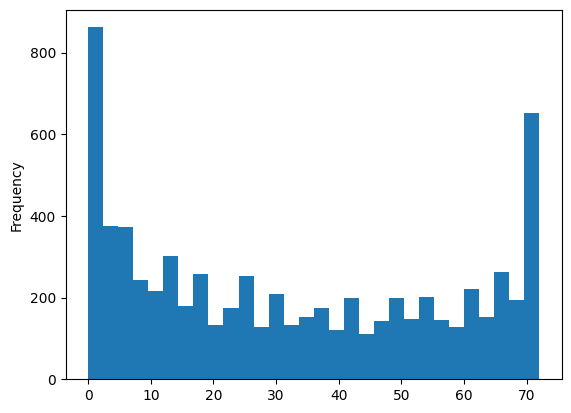

In [20]:
data['tenure'].plot(kind='hist', bins=30)

In [21]:
print(f"Maximum tenure:{data['tenure'].max()} and Minimum tenure:{data['tenure'].min()}")

Maximum tenure:72 and Minimum tenure:0


* There are many cutomers who stayed only 0 months

* is there any correlation between churan rate and maximum tenure

In [22]:
data[[ 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',]].head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,No,No phone service,DSL,No,Yes,No,No
1,Yes,No,DSL,Yes,No,Yes,No
2,Yes,No,DSL,Yes,Yes,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes
4,Yes,No,Fiber optic,No,No,No,No


In [23]:
data['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [24]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

<Axes: xlabel='PhoneService'>

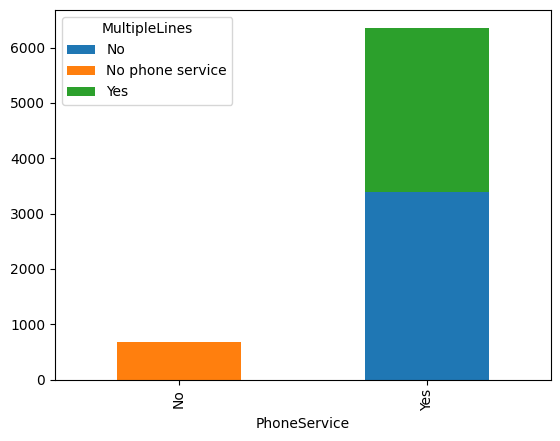

In [25]:
data.groupby(['PhoneService','MultipleLines']).count().unstack(level=1)['customerID'].plot(kind='bar', stacked=True)

In [26]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

<Axes: xlabel='PhoneService'>

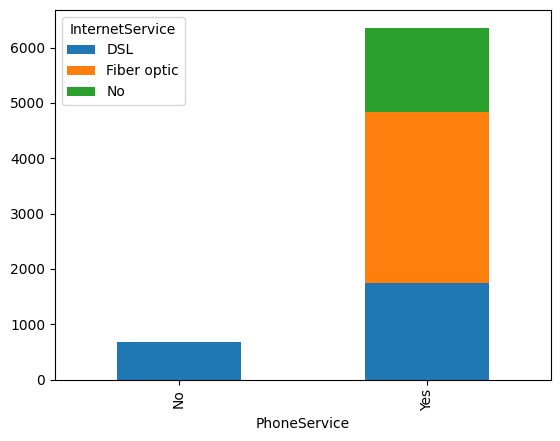

In [27]:
data.groupby(['PhoneService','InternetService']).count().unstack(level=1)['customerID'].plot(kind='bar', stacked=True)

In [91]:
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [92]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with random state for reproducibility
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, Y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(Y_train_smote).value_counts())


0    3304
1    3304
Name: count, dtype: int64


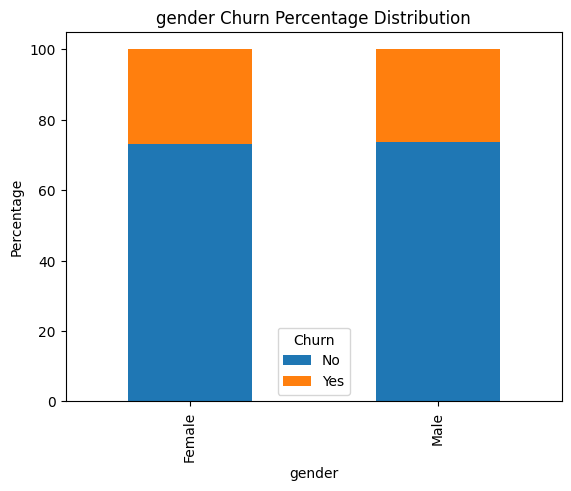

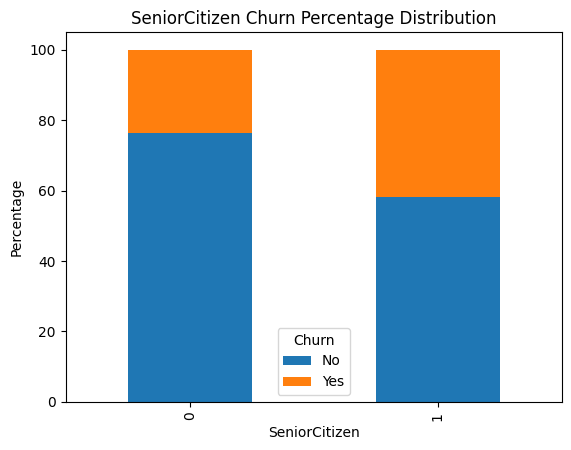

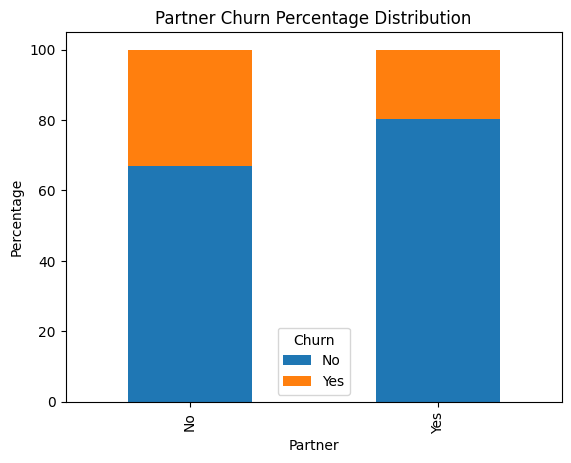

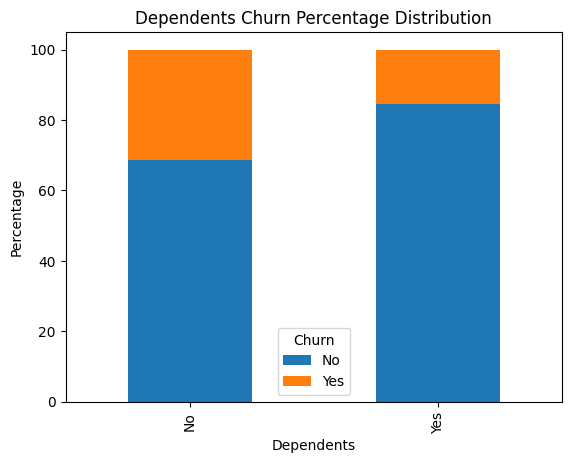

In [28]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for i in features:
    churn_percentage = data.groupby(i)['Churn'].value_counts(normalize=True).unstack() * 100
    churn_percentage.plot(kind='bar', stacked=True)
    plt.xlabel(i)
    plt.ylabel('Percentage')
    plt.title(f'{i} Churn Percentage Distribution')
    plt.show()

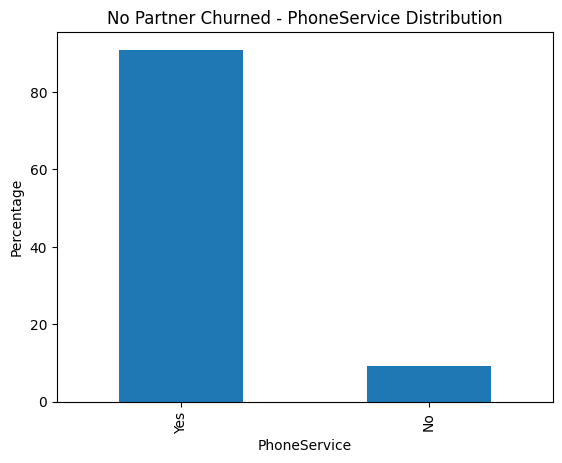

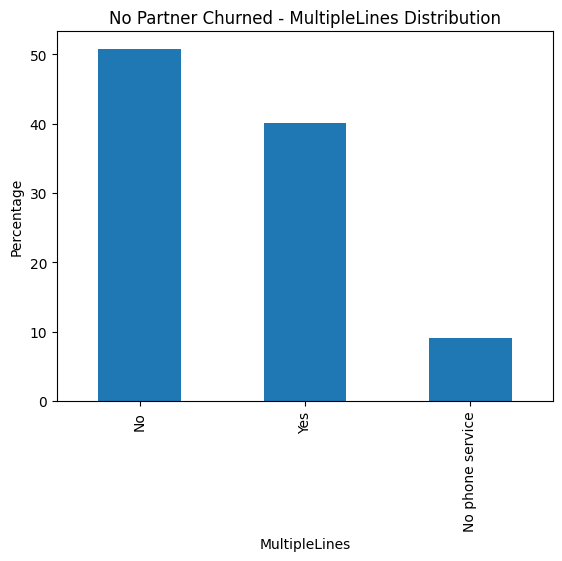

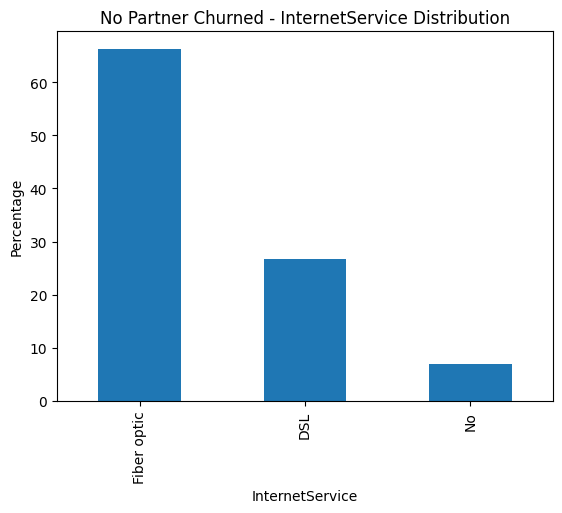

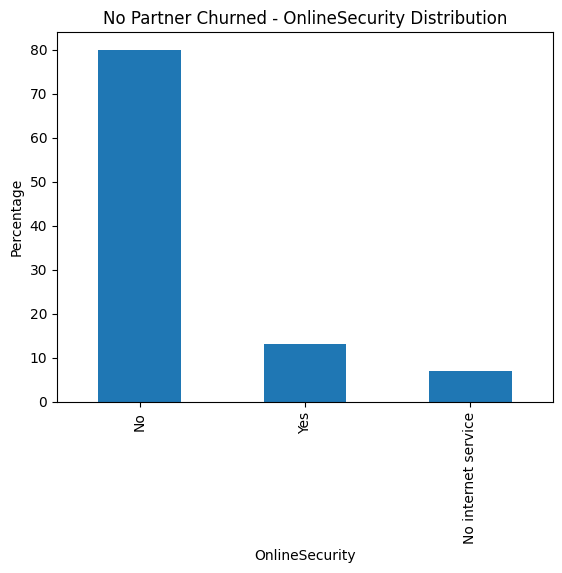

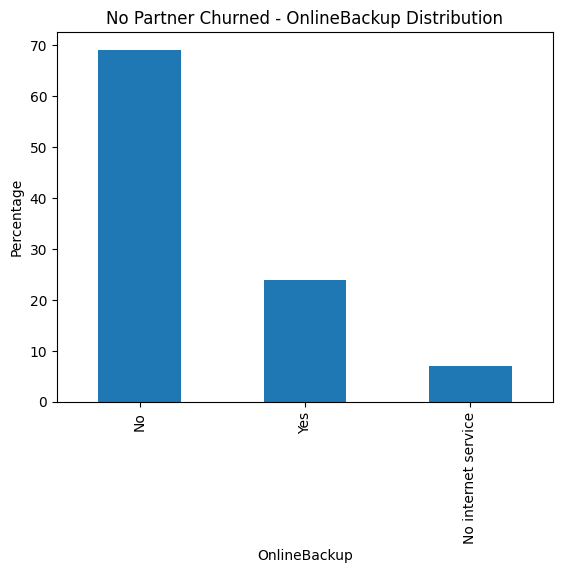

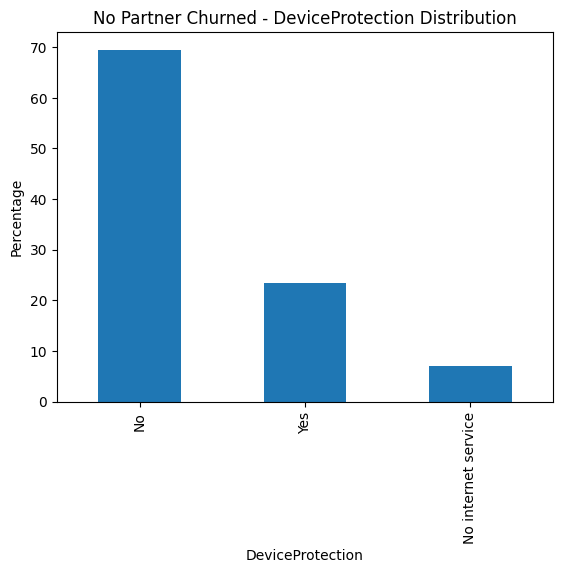

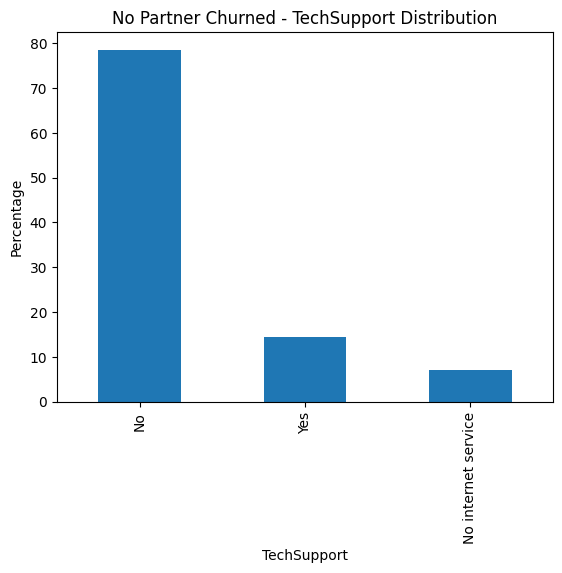

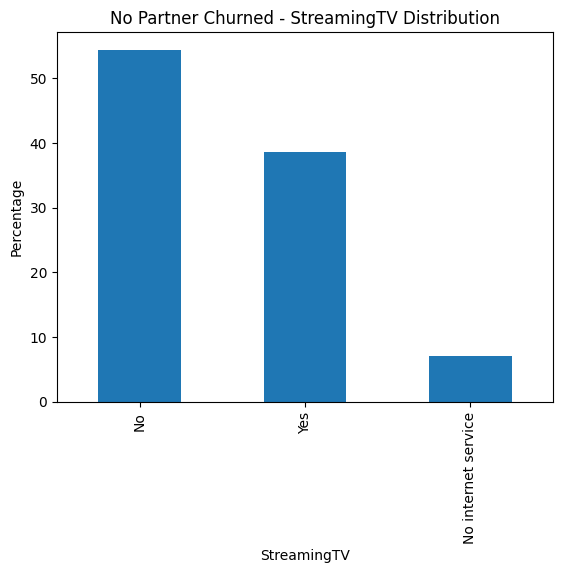

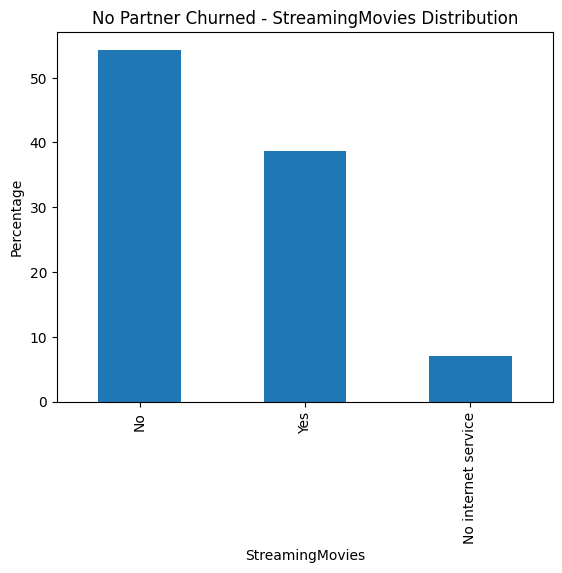

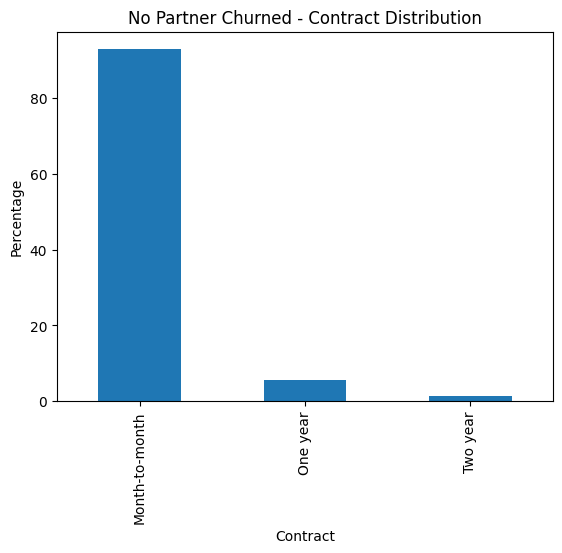

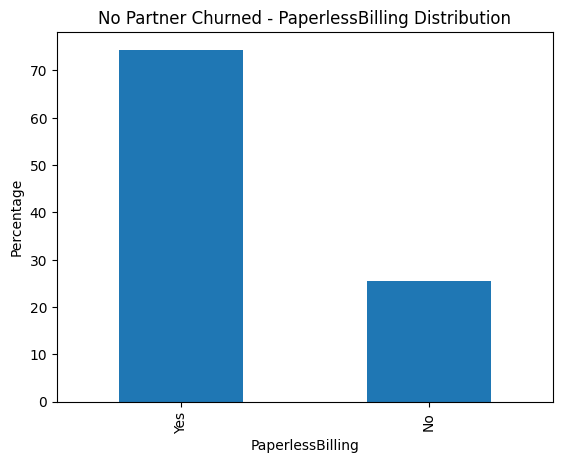

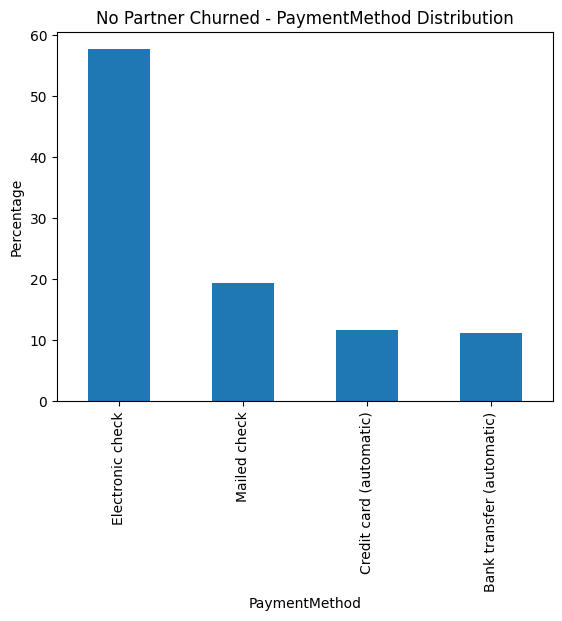

In [29]:
# Analyze the services taken by senior citizens who churned
senior_citizen_churn = data[(data['Partner'] == 'No') & (data['Churn'] == 'Yes')]
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in service_features:
    service_data = senior_citizen_churn[feature].value_counts(normalize=True) * 100
    service_data.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.title(f'No Partner Churned - {feature} Distribution')
    plt.show()

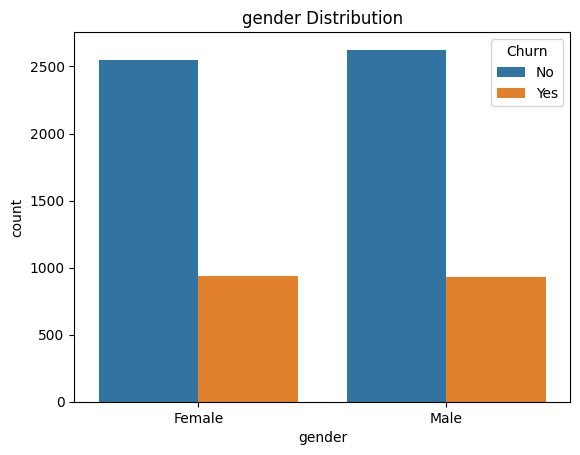

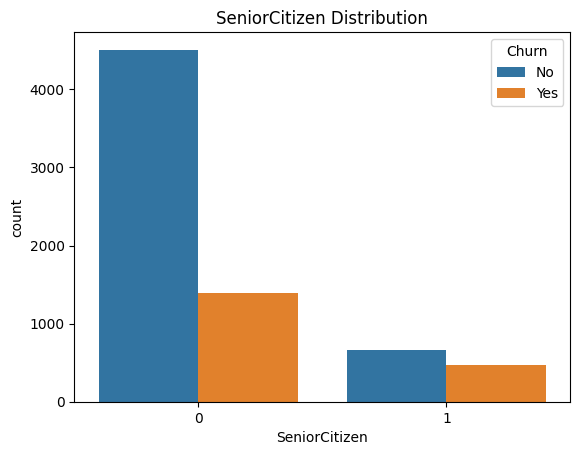

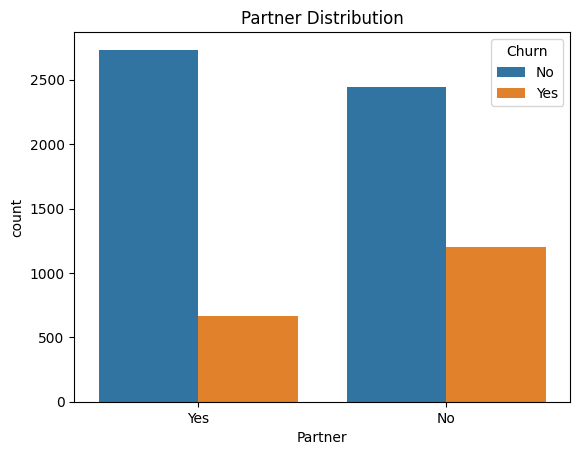

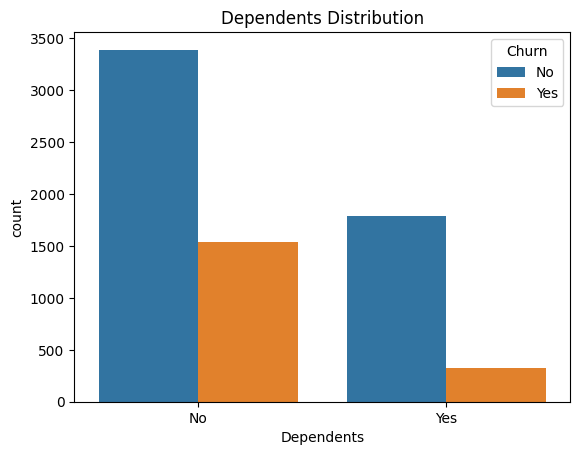

In [30]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for i in features:
    sns.countplot(x=i,data=data, hue='Churn')
    plt.xlabel(i)

    plt.title(f'{i} Distribution')
    plt.show()

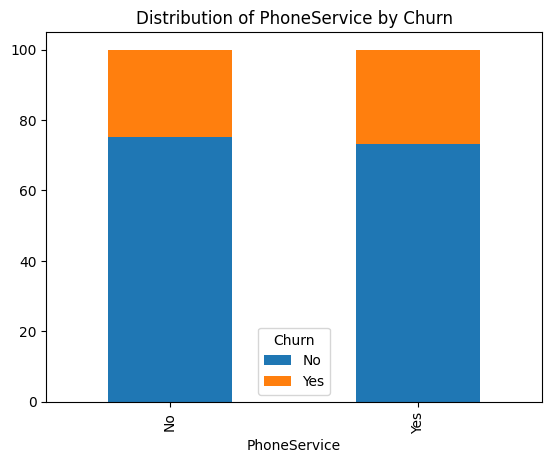

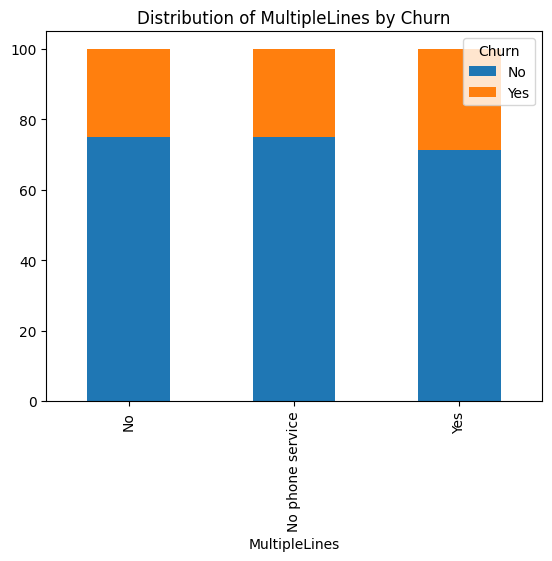

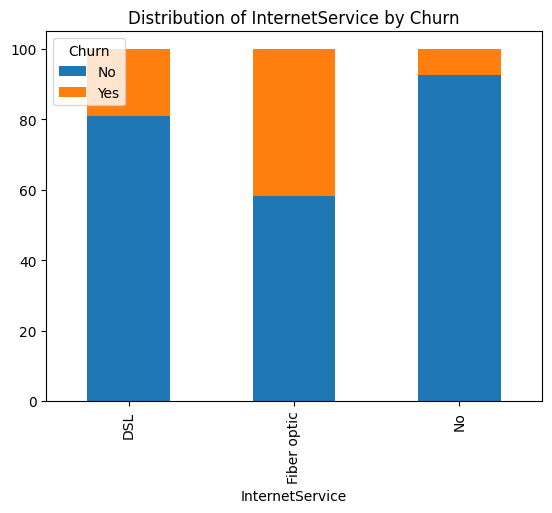

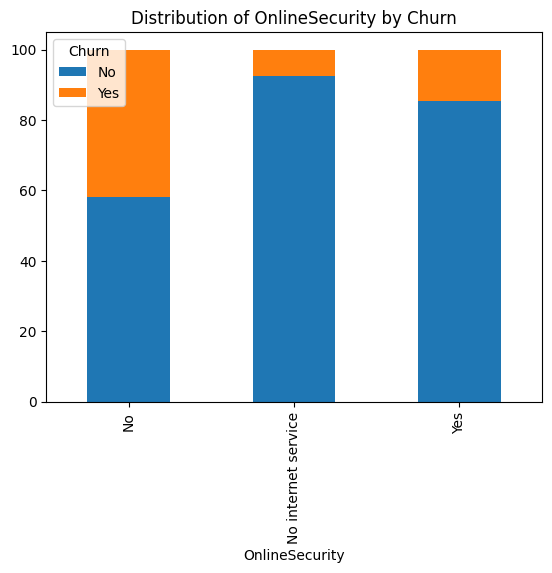

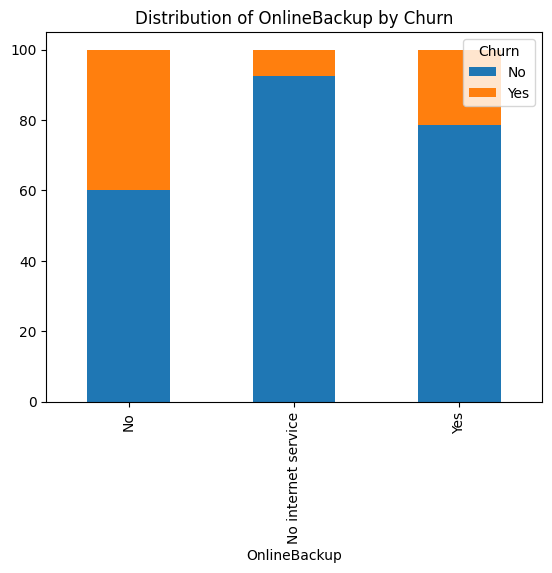

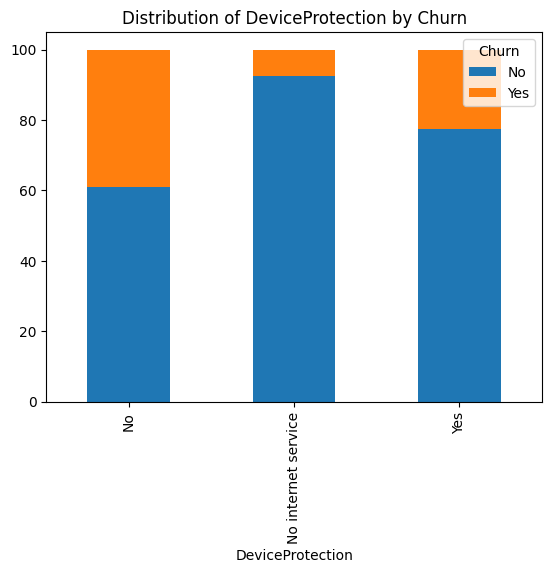

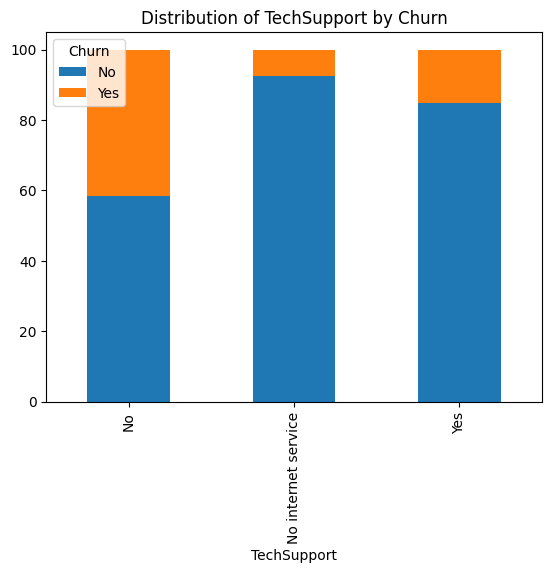

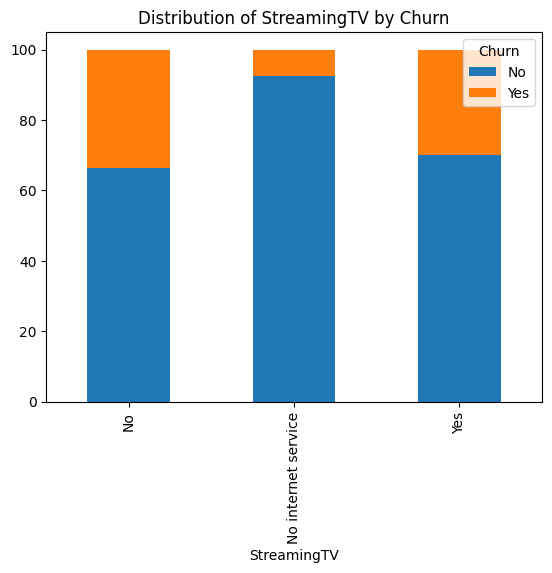

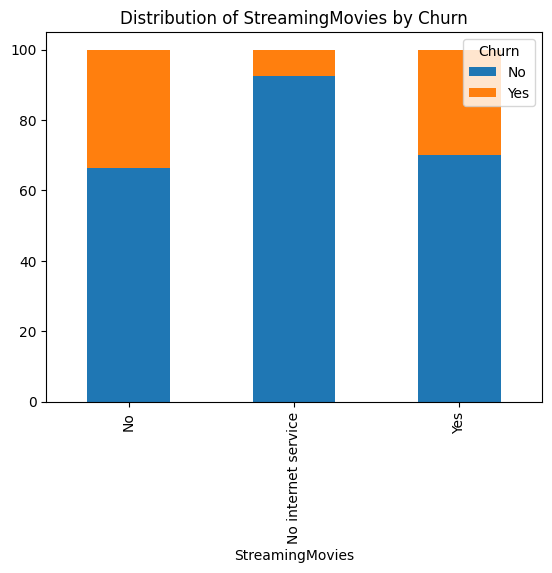

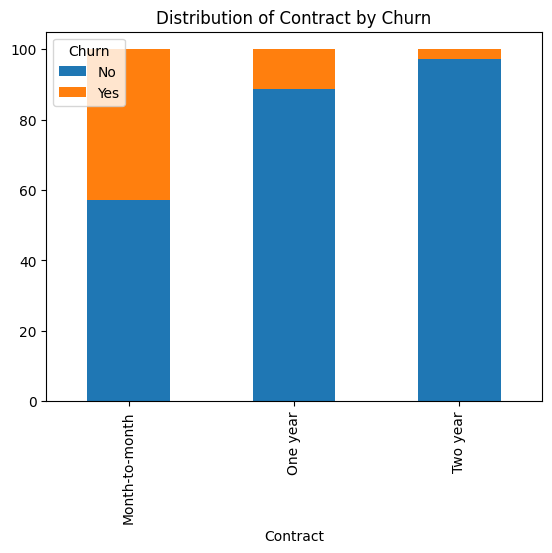

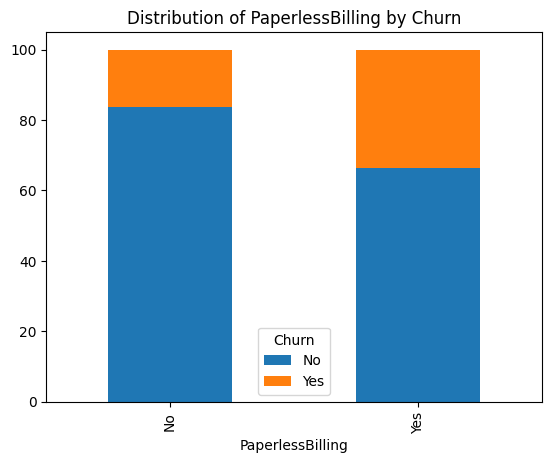

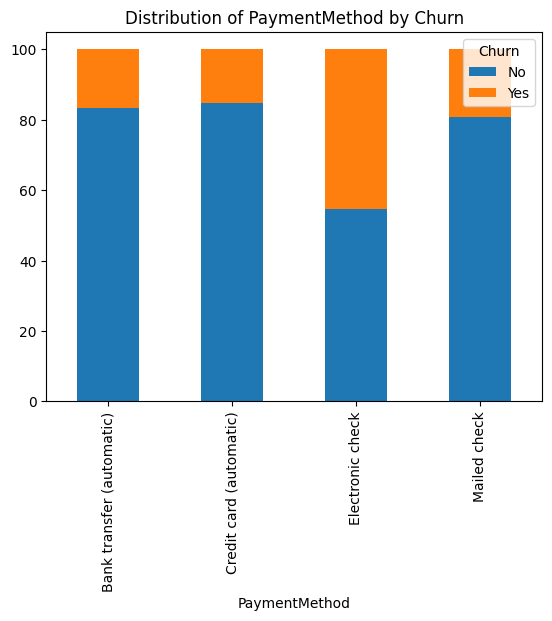

In [31]:
features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in features:
    churn_percentage = data.groupby(feature)['Churn'].value_counts(normalize=True).unstack() * 100
    churn_percentage.plot(kind='bar', stacked=True)
    # sns.countplot(data=data, x=feature, hue='Churn')
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()

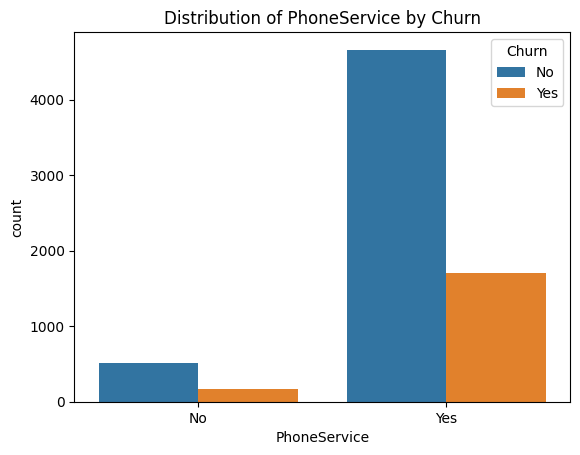

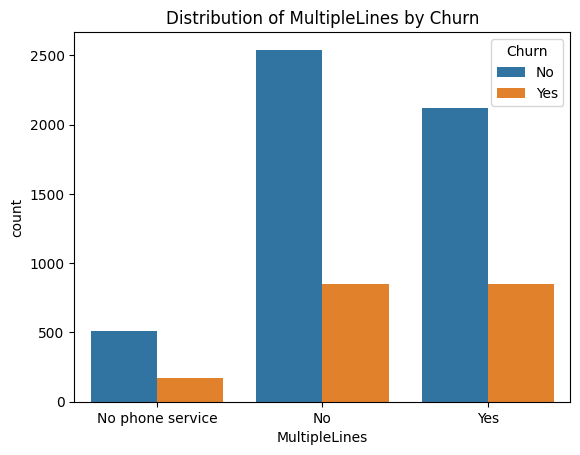

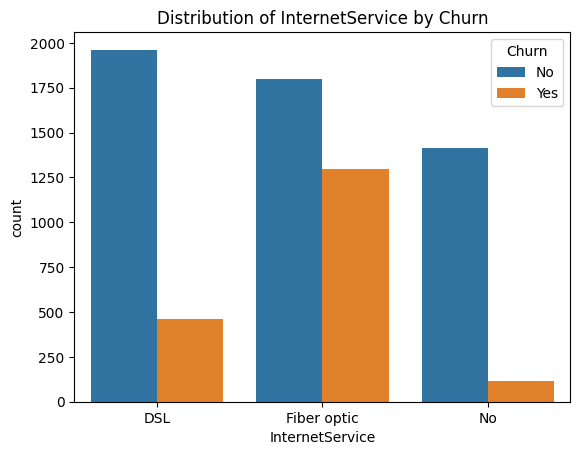

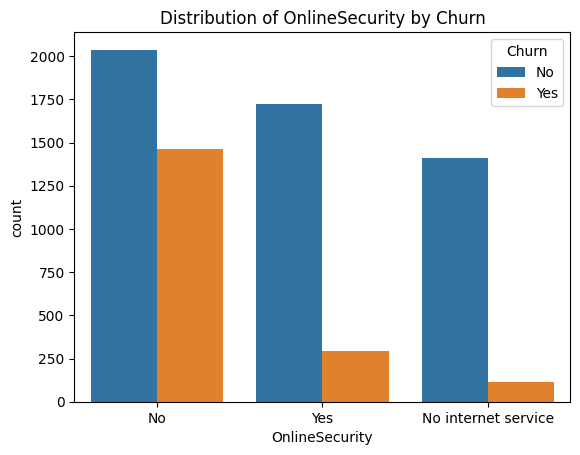

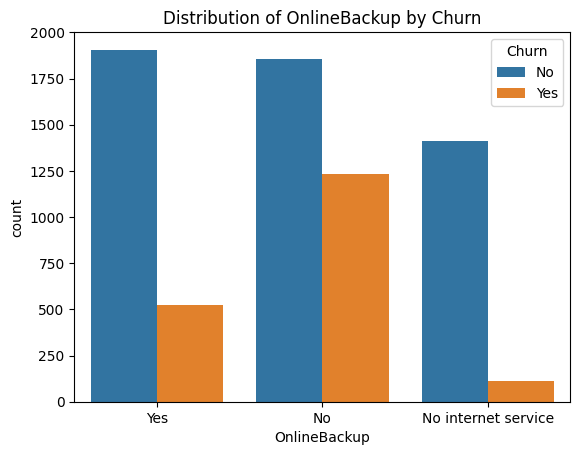

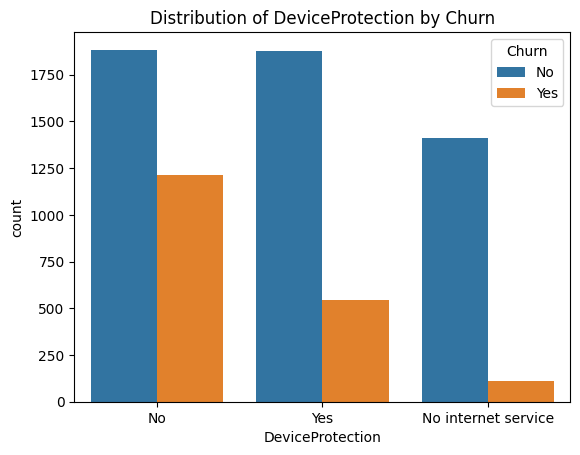

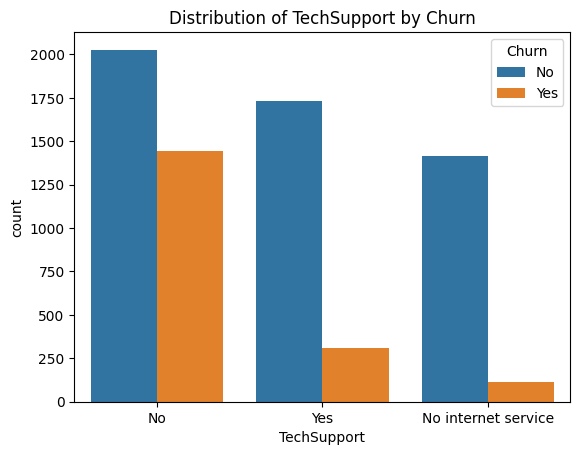

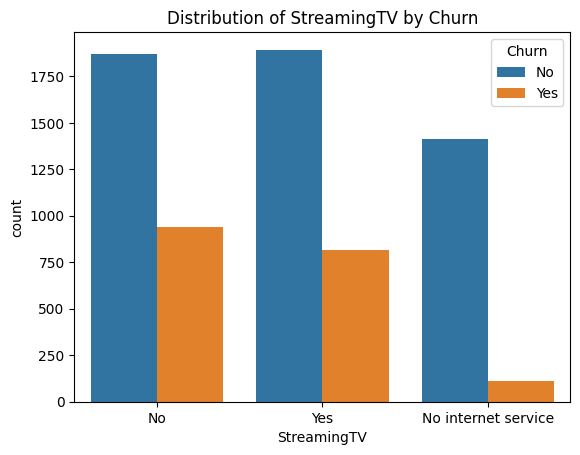

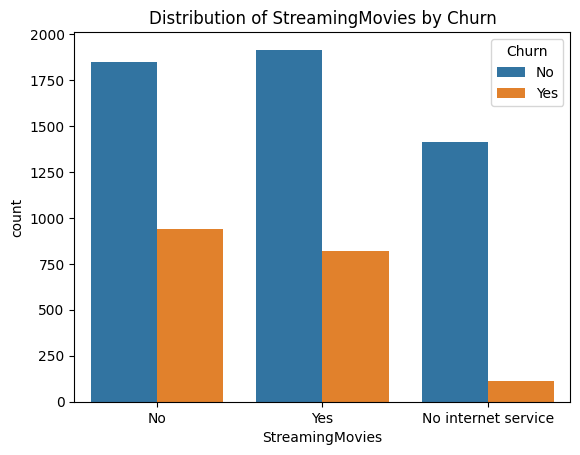

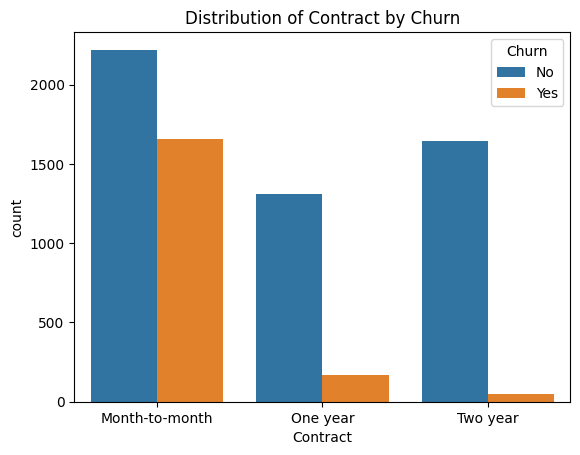

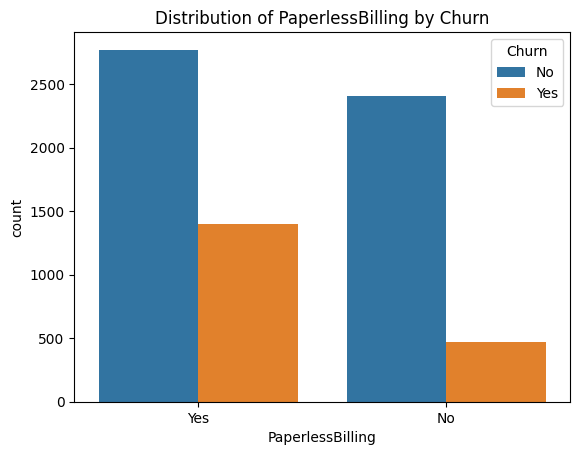

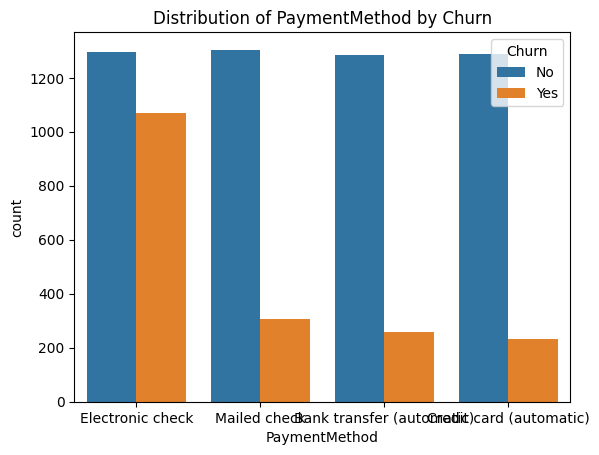

In [32]:
features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for feature in features:
    sns.countplot(data=data, x=feature, hue='Churn')
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


In [33]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
data[['MonthlyCharges', 'TotalCharges']]

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.5
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.5
7039,103.20,7362.9
7040,29.60,346.45
7041,74.40,306.6


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

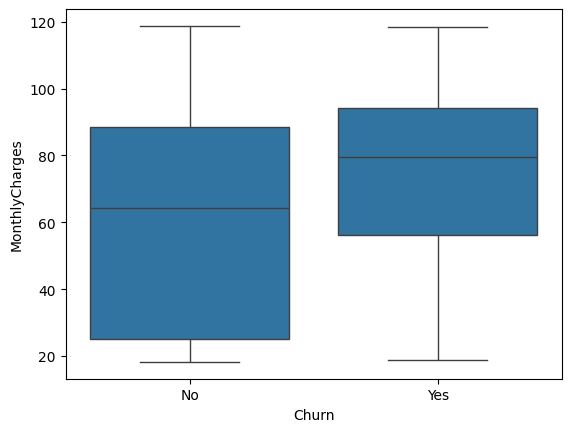

In [35]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

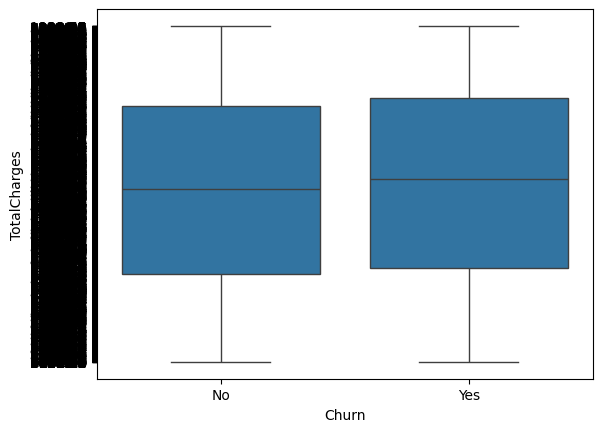

In [36]:
sns.boxplot(x='Churn', y='TotalCharges', data=data)

In [37]:
data['TotalCharges'].isna().sum()   

0

In [38]:
data[data['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [39]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data[data['tenure'] == 0].index

Index([], dtype='int64')

In [40]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
data.fillna(data["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


C:\Users\udayb\AppData\Local\Temp\ipykernel_23772\2706960071.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
C:\Users\udayb\AppData\Local\Temp\ipykernel_23772\2706960071.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],


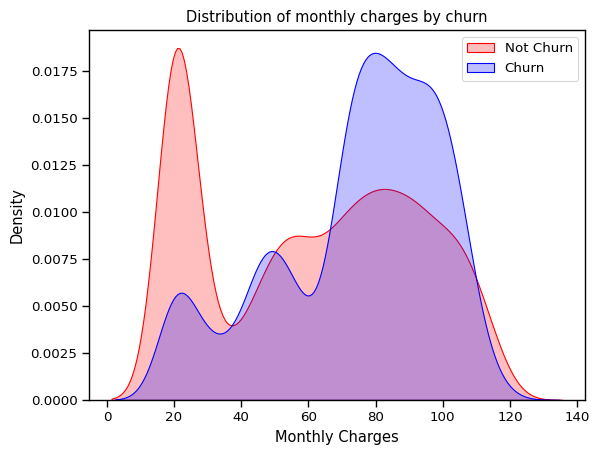

In [42]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

C:\Users\udayb\AppData\Local\Temp\ipykernel_23772\1919219197.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
C:\Users\udayb\AppData\Local\Temp\ipykernel_23772\1919219197.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],


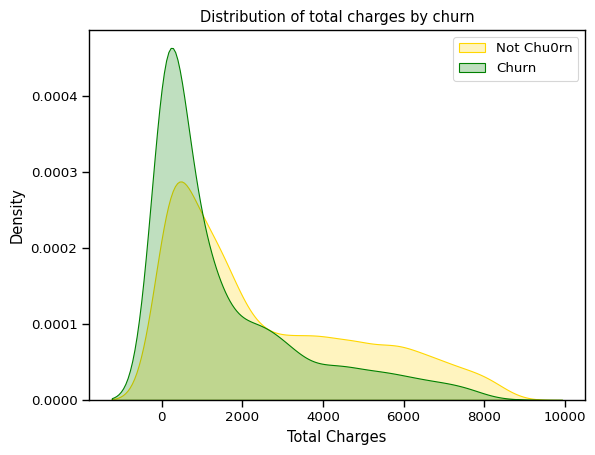

In [43]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [44]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='tenure'>

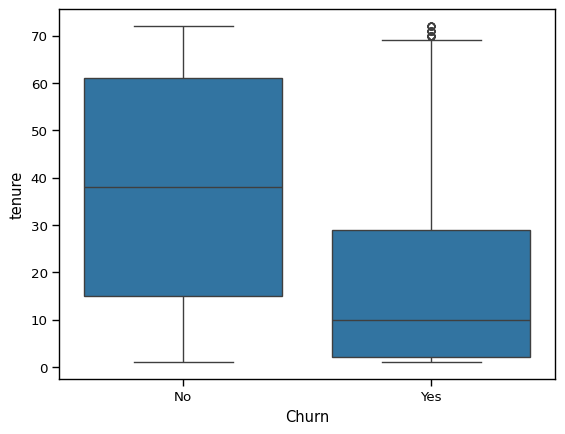

In [45]:
sns.set_context("paper",font_scale=1.1)
sns.boxplot(x='Churn',y='tenure',data=data)

In [46]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [49]:
X = data.drop(['Churn','customerID'],axis=1)
Y = data['Churn']

In [50]:
print(X.shape)

(7032, 19)


In [51]:

X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

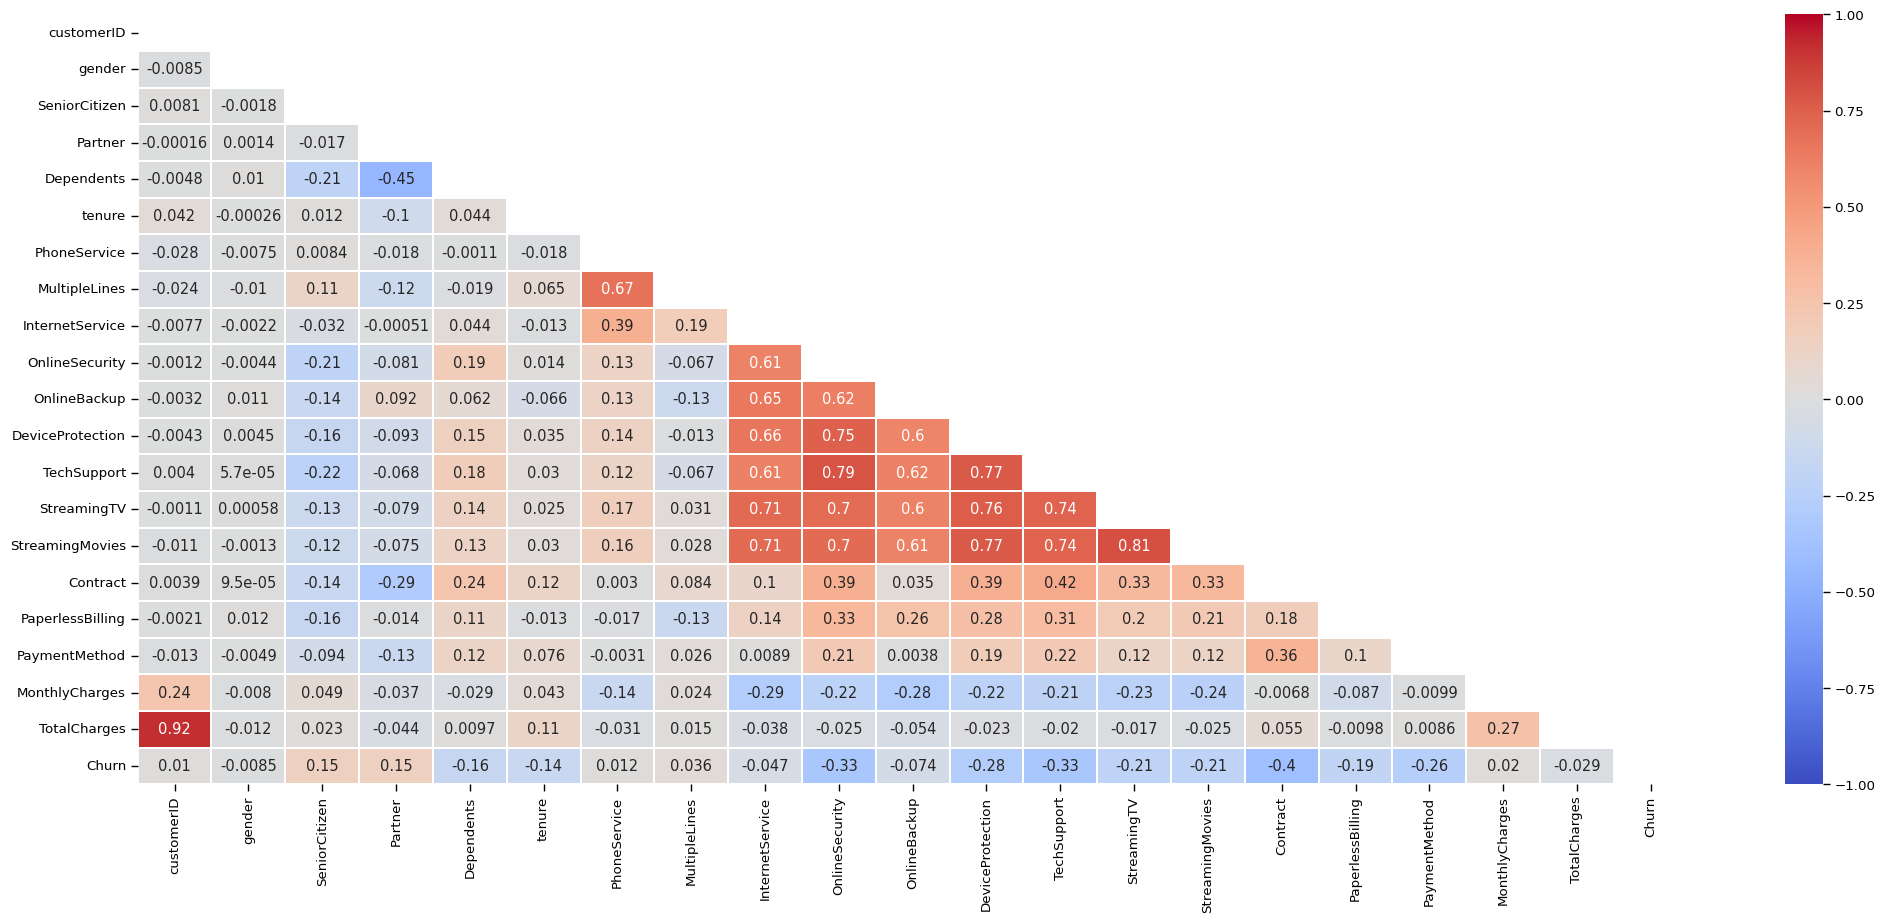

In [52]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [69]:
Y = LabelEncoder().fit_transform(Y)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42,stratify=y_train)

In [72]:
label = LabelEncoder()
scaler = StandardScaler()
for i in X_train.columns:
    if X_train[i].dtype == 'object' and i != 'SeniorCitizen':
        X_train[i] = label.fit_transform(X_train[i])
        X_val[i] = label.transform(X_val[i])
        X_test[i] = label.transform(X_test[i])
    elif X_train[i].dtype == 'int64' or X_train[i].dtype == 'float64' and i != 'SeniorCitizen':
        X_train[i] = scaler.fit_transform(X_train[[i]])
        X_val[i] = scaler.transform(X_val[[i]])
        X_test[i] = scaler.transform(X_test[[i]])


# Machine Learning Model fitting

In [73]:
import mlflow.sklearn

## RandomForestClassifier

In [74]:
X_train = X_train.copy()  # Ensure the data is not memory-mapped
y_train = y_train.copy()

In [75]:
from mlflow.models.signature import infer_signature

In [83]:
Param_grid ={

# 'RandomForest': {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# },

# 'GradientBoosting' : {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# },
'AdaBoost': {
    'n_estimators': [50, 100, 200, 300, 500],  # Increased range for number of estimators
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0],  # Wider range of learning rates
    'algorithm': ['SAMME', 'SAMME.R'],  # Both boosting algorithms
    'base_estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=5)  # Allow trees of varying complexity
    ]
}

}
# 'LogisticRegression':{
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['saga', 'liblinear', 'lbfgs'],
#     'max_iter': [100, 200, 300]
# },

# 'KNeighbors' : {
#     'n_neighbors': [3, 5, 10, 15],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }
# }




In [84]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
mlflow.set_experiment('Customer Churn Prediction')

<Experiment: artifact_location='file:///c:/Users/udayb/OneDrive/Desktop/MLprojects/1.%20ChurnProject/mlruns/861406955602159501', creation_time=1737085444075, experiment_id='861406955602159501', last_update_time=1737085444075, lifecycle_stage='active', name='Customer Churn Prediction', tags={}>

In [94]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
)
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np
import os
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\udayb\OneDrive\Desktop\MLprojects\1. ChurnProject\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\udayb\OneDrive\Desktop\MLprojects\1. ChurnProject\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\udayb\OneDrive\Desktop\MLprojects\1. ChurnProject\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\udayb\OneDrive\Desktop\MLprojects\1. ChurnProject

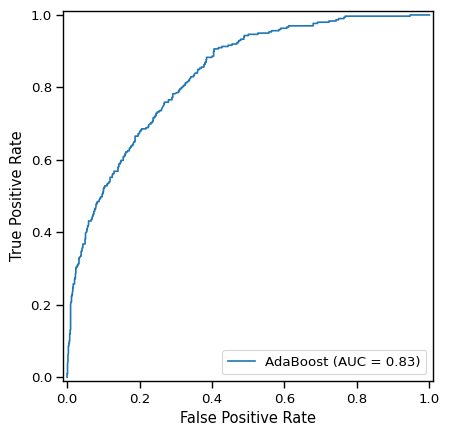

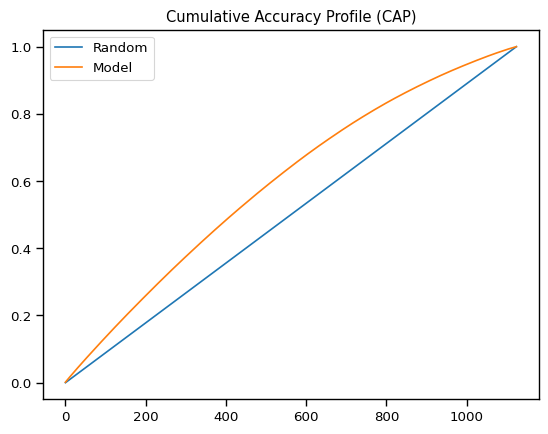

In [107]:
# Define all classifiers in a dictionary
classifiers = {
    # 'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    # 'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    # 'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    # 'KNeighbors': KNeighborsClassifier()
}
# Function to save plots
def save_plot(fig, filename):
    if not os.path.exists("plots"):
        os.makedirs("plots")
    filepath = f"plots/{filename}.png"
    fig.savefig(filepath)
    return filepath

# SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Iterate over each classifier
for name, model in classifiers.items():
    with mlflow.start_run(run_name=name) as run:
        # Set up GridSearchCV for the model
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=Param_grid[name],  # Define param_grid specific to each model
            cv=3,
            n_jobs=-1,
            verbose=2
        )
        # Fit the model
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Log best parameters
        mlflow.log_params(grid_search.best_params_)

        # Evaluate the model
        y_pred = grid_search.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Log metrics
        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('precision', precision)
        mlflow.log_metric('recall', recall)
        mlflow.log_metric('f1_score', f1)

        # Log classification report
        report = classification_report(y_val, y_pred, output_dict=True)
        mlflow.log_dict(report, "classification_report.json")

        # ROC Curve
        if hasattr(model, "predict_proba"):  # Only for models with predict_proba
            y_prob = grid_search.predict_proba(X_val)[:, 1]
            fpr, tpr, _ = roc_curve(y_val, y_prob)
            roc_auc = auc(fpr, tpr)
            fig, ax = plt.subplots()
            RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot(ax=ax)
            roc_curve_path = save_plot(fig, f"roc_curve_{name}")
            mlflow.log_artifact(roc_curve_path)
            mlflow.log_metric("roc_auc", roc_auc)

        # CAP Curve
        fig, ax = plt.subplots()
        y_cum_proba = np.cumsum(np.sort(y_prob)[::-1]) / sum(y_prob)
        random_line = np.linspace(0, 1, len(y_prob))
        ax.plot(random_line, label='Random')
        ax.plot(y_cum_proba, label='Model')
        ax.set_title('Cumulative Accuracy Profile (CAP)')
        ax.legend()
        cap_curve_path = save_plot(fig, f"cap_curve_{name}")
        mlflow.log_artifact(cap_curve_path)

        # Log the model
        signature = infer_signature(X_train, grid_search.predict(X_train))
        mlflow.sklearn.log_model(grid_search.best_estimator_, "model", signature=signature)

# Model Validation

In [108]:
# Example for one row of X_test
INPUT_EXAMPLE = X_test.iloc[0].to_dict()


In [109]:
from mlflow.models import validate_serving_input, convert_input_example_to_serving_input
import pandas as pd

# Ensure INPUT_EXAMPLE is one instance from your test set
INPUT_EXAMPLE = X_test.iloc[0].to_dict()

# Define the model URI
model_uri = 'file:///c:/Users/udayb/OneDrive/Desktop/MLprojects/1.%20ChurnProject/mlruns/861406955602159501/e9e5676a39de4d3c824e042bcc8f370a/artifacts/model'

# Convert the input example to serving payload
serving_payload = convert_input_example_to_serving_input(INPUT_EXAMPLE)

# Validate the model serving input
validate_serving_input(model_uri, serving_payload)
print("Model serving input validated successfully.")


Model serving input validated successfully.


In [110]:
import mlflow.pyfunc

# Load the registered model
model = mlflow.pyfunc.load_model(model_uri)

# Perform predictions on the test set
predictions = model.predict(X_test)

# Compare predictions with true labels (Y_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



In [111]:
X_test.shape

(1407, 19)

In [ ]:
X_test